In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chethuhn/network-intrusion-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/network-intrusion-dataset


In [2]:
import os
import shutil

source_path = "/kaggle/input/network-intrusion-dataset"
destination_path = "/content"

# Create the destination directory if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# Copy the contents of the source directory to the destination directory
shutil.copytree(source_path, destination_path, dirs_exist_ok=True)

print(f"Dataset copied from {source_path} to {destination_path}")

Dataset copied from /kaggle/input/network-intrusion-dataset to /content


In [1]:
import pandas as pd
import os
import re
from glob import glob

# Set path to your folder
folder_path = '/content'

# Get all .csv files in the folder
csv_files = glob(os.path.join(folder_path, '*.csv'))

# Function to parse day from filename
def parse_day(filename):
    day_match = re.search(r'(Monday|Tuesday|Wednesday|Thursday|Friday)', filename, re.IGNORECASE)
    return day_match.group(1).capitalize() if day_match else 'Unknown'

# Initialize empty list to collect DataFrames
dataframes = []

# Read and process each file
for file_path in csv_files:
    try:
        df = pd.read_csv(file_path, low_memory=False)
        filename = os.path.basename(file_path)
        day = parse_day(filename)
        df['Day'] = day
        dataframes.append(df)
    except Exception as e:
        print(f"Error reading {filename}: {e}")

# Concatenate all data
combined_df = pd.concat(dataframes, ignore_index=True)

# Show combined structure
print("Shape:", combined_df.shape)
print("Columns:", combined_df.columns.tolist())
print("Sample:")
print(combined_df['Day'].value_counts().reset_index().head())

# Save combined dataset
combined_df.to_csv('/content/combined_cicids2017.csv', index=False)


Shape: (2830743, 80)
Columns: [' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined dataset
df = pd.read_csv('/content/combined_cicids2017.csv')

# Show basic info
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes.value_counts())
print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False).head(10))

# Show the first few rows
df.head()


Shape: (2830743, 80)

Data Types:
 int64      54
float64    24
object      2
Name: count, dtype: int64

Missing values:
 Flow Bytes/s                    1358
 Destination Port                  0
 Total Fwd Packets                 0
 Flow Duration                     0
Total Length of Fwd Packets        0
 Total Length of Bwd Packets       0
 Fwd Packet Length Max             0
 Total Backward Packets            0
 Fwd Packet Length Min             0
 Fwd Packet Length Mean            0
dtype: int64


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Day
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Wednesday
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Wednesday
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Wednesday
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Wednesday
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,Wednesday


In [7]:
print("Column names in dataset:")
print(df.columns.tolist())

Column names in dataset:
[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK

Unique labels: ['BENIGN' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'Heartbleed' 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'PortScan' 'Bot' 'Infiltration'
 'FTP-Patator' 'SSH-Patator' 'DDoS']


/tmp/ipython-input-10-733235949.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=' Label', order=df[' Label'].value_counts().index, palette="viridis")


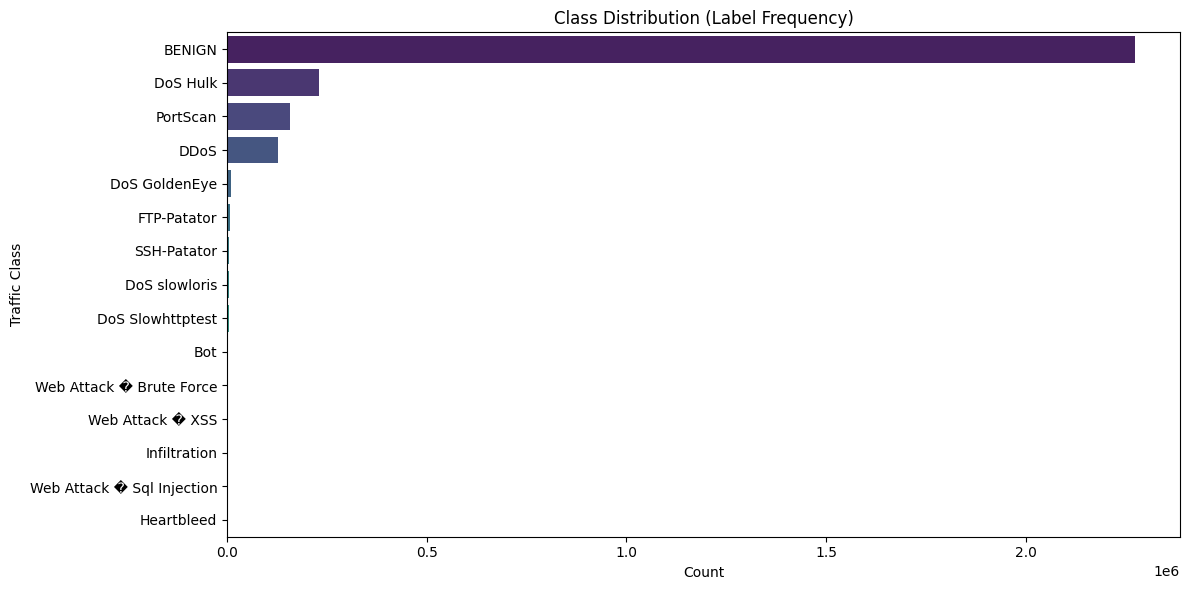


Class balance (absolute):
  Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

Class balance (percentage):
  Label
BENIGN                        80.300366
DoS Hulk                       8.162981
PortScan                       5.614427
DDoS                           4.522735
DoS GoldenEye                  0.363615
FTP-Patator                    0.280421
SSH-Patator                    0.208320
DoS slowloris                  0.204752
DoS Slowhttp

In [10]:
# Check label column name (often "Label" or "label")
print("Unique labels:", df[' Label'].unique())

# Plot class distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y=' Label', order=df[' Label'].value_counts().index, palette="viridis")
plt.title("Class Distribution (Label Frequency)")
plt.xlabel("Count")
plt.ylabel("Traffic Class")
plt.tight_layout()
plt.show()

# Display value counts as a table
print("\nClass balance (absolute):\n", df[' Label'].value_counts())
print("\nClass balance (percentage):\n", df[' Label'].value_counts(normalize=True) * 100)

In [11]:
# Describe numerical features only
numerical_cols = df.select_dtypes(include='number').columns
print("Total numerical features:", len(numerical_cols))

# Summary statistics
df[numerical_cols].describe().T.head(10)


Total numerical features: 78


,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.0,53.0,80.0,4.430000e+02,6.553500e+04
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-13.0,155.0,31316.0,3.204828e+06,1.200000e+08
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.0,2.0,2.0,5.000000e+00,2.197590e+05
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.0,1.0,2.0,4.000000e+00,2.919220e+05
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.0,12.0,62.0,1.870000e+02,1.290000e+07
Total Length of Bwd Packets,2830743.0,1.616264e+04,2.263088e+06,0.0,0.0,123.0,4.820000e+02,6.554530e+08
Fwd Packet Length Max,2830743.0,2.075999e+02,7.171848e+02,0.0,6.0,37.0,8.100000e+01,2.482000e+04
Fwd Packet Length Min,2830743.0,1.871366e+01,6.033935e+01,0.0,0.0,2.0,3.600000e+01,2.325000e+03
Fwd Packet Length Mean,2830743.0,5.820194e+01,1.860912e+02,0.0,6.0,34.0,5.000000e+01,5.940857e+03
Fwd Packet Length Std,2830743.0,6.891013e+01,2.811871e+02,0.0,0.0,0.0,2.616295e+01,7.125597e+03


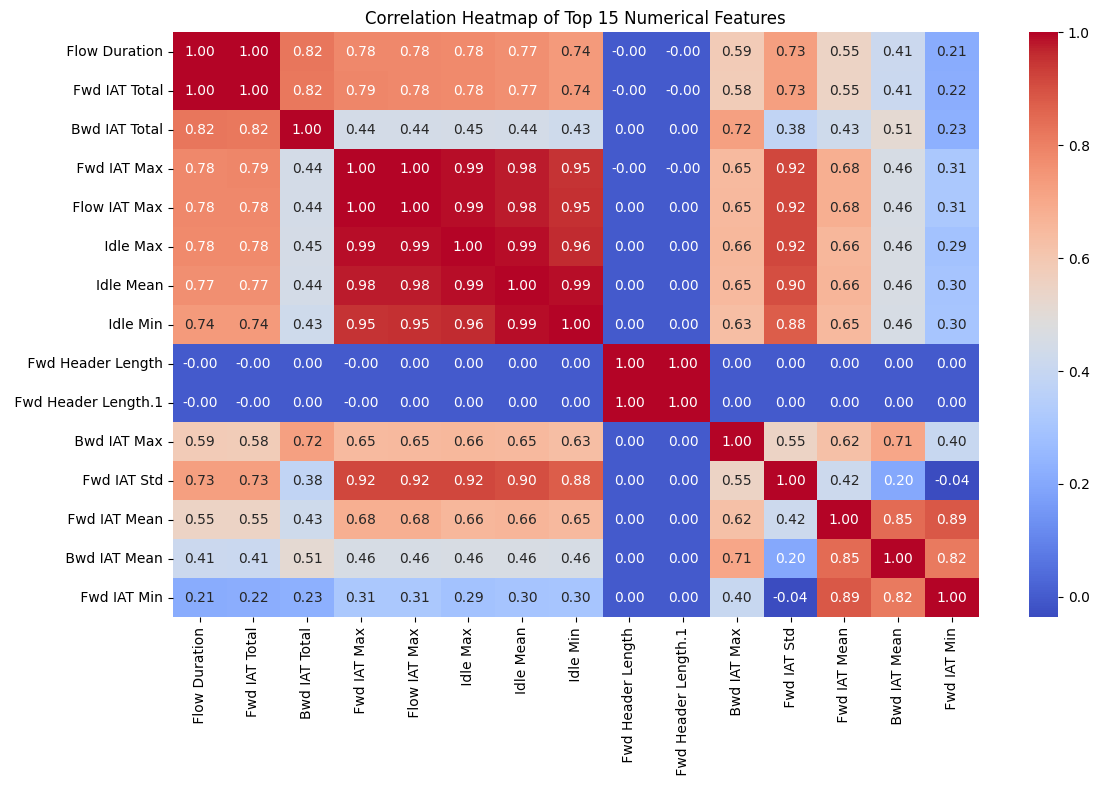

In [12]:
# Compute correlation matrix
corr = df[numerical_cols].corr()

# Plot heatmap for top 15 features based on std deviation
top_features = df[numerical_cols].std().sort_values(ascending=False).head(15).index
plt.figure(figsize=(12, 8))
sns.heatmap(df[top_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Top 15 Numerical Features")
plt.tight_layout()
plt.show()

In [13]:
!pip install torch torchvision pandas matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 672.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 36.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load data
df = pd.read_csv('/content/Wednesday-workingHours.pcap_ISCX.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Filter BENIGN and DoS Hulk only
df = df[df['Label'].isin(['BENIGN', 'DoS Hulk'])]

# Keep numeric columns only
df_numeric = df.select_dtypes(include=[np.number])

# Drop missing/infinite values
df_numeric = df_numeric.replace([np.inf, -np.inf], np.nan).dropna()

# Normalize
scaler = MinMaxScaler()
X = scaler.fit_transform(df_numeric)

print("Final shape for GAN input:", X.shape)

Final shape for GAN input: (669807, 78)


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_dim = X.shape[1]
latent_dim = 100

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )

    def forward(self, z):
        return self.model(z)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Instantiate models
G = Generator().to(device)
D = Discriminator().to(device)

In [4]:
# Generate synthetic feature vectors using trained generator
G.eval()
num_samples = 5000
latent_dim = 100

with torch.no_grad():
    z = torch.randn(num_samples, latent_dim).to(device)
    synthetic_data = G(z).cpu().numpy()


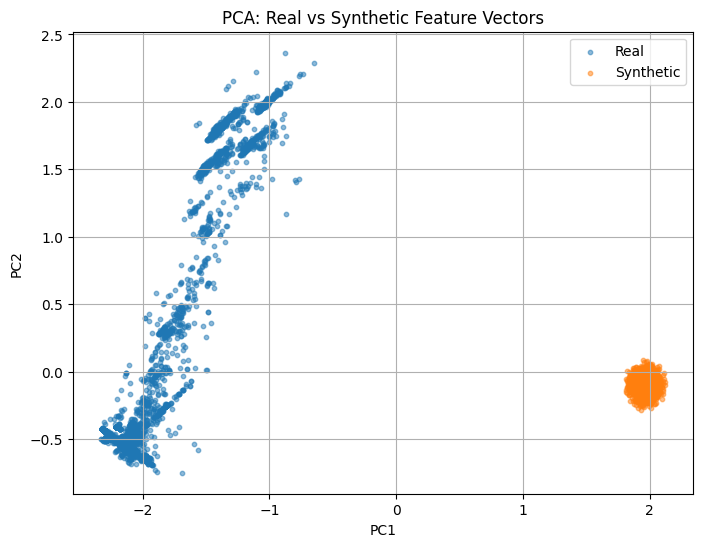

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Take equal samples from real data
real_sample = X[np.random.choice(X.shape[0], num_samples, replace=False)]

# Concatenate for PCA
combined_data = np.vstack([real_sample, synthetic_data])
labels = np.array(['Real'] * num_samples + ['Synthetic'] * num_samples)

# Apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(combined_data)

# Plot
plt.figure(figsize=(8,6))
for label in ['Real', 'Synthetic']:
    idx = labels == label
    plt.scatter(components[idx, 0], components[idx, 1], label=label, alpha=0.5, s=10)

plt.legend()
plt.title('PCA: Real vs Synthetic Feature Vectors')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


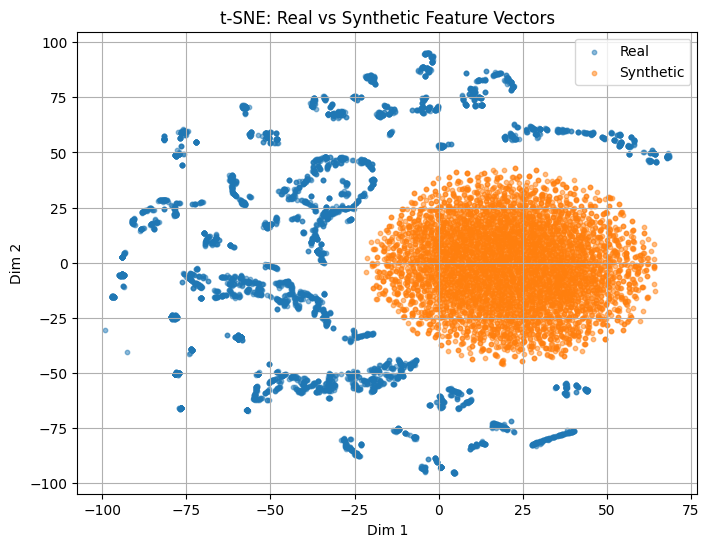

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
tsne_result = tsne.fit_transform(combined_data)

# Plot
plt.figure(figsize=(8,6))
for label in ['Real', 'Synthetic']:
    idx = labels == label
    plt.scatter(tsne_result[idx, 0], tsne_result[idx, 1], label=label, alpha=0.5, s=10)

plt.legend()
plt.title('t-SNE: Real vs Synthetic Feature Vectors')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.grid(True)
plt.show()

In [7]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

mean_real = real_sample.mean(axis=0).reshape(1, -1)
mean_fake = synthetic_data.mean(axis=0).reshape(1, -1)

cos_sim = cosine_similarity(mean_real, mean_fake)[0][0]
eucl_dist = euclidean_distances(mean_real, mean_fake)[0][0]

print(f"Cosine Similarity: {cos_sim:.4f}")
print(f"Euclidean Distance: {eucl_dist:.4f}")

Cosine Similarity: 0.5343
Euclidean Distance: 3.9272
